# Factors Influencing American College Admissions
### DS 2500 Fall 2022 - Dr. Matthew Higger
### Brady Duncan, Benjamin Ecsedy, Jack Krolik, Robert (Harrison) Voigt

# Table of Contents
- [Executive Summary](#summary)
- [Introduction](#intro)
- [Data Description](#dd)
- [Method](#method)
- [Results](#results)
- [Discussion](#discussion)

<a id='summary'></a>
## Executive Summary
Our project aimed to explore the range of socioeconomic and demographic factors that impact college admissions, primarily through the mechanism of standardized testing. Using a [random forest regressor](#rf), we found that the percentage of low-income students at a specific institution was the most significant factor in predicting that institution’s average standardized test scores. Furthermore, we observed through a [single-variable regression](#svr) that the correlation between the percentage of low-income students and standardized test scores was significantly negative. We also conducted a [PCA analysis](#pca) with [K-Means Clustering](#kmeans), which failed to clearly show any relevant trends. While our conclusions may not be perfectly applicable to the field, they can be used to guide future research and encourage a deeper reflection by admissions practitioners.

<a id='intro'></a>
## Introduction

Although once thought to be useful for classifying student competence and preparing students for admission to college, in recent years, the merits of standardized testing [have been debated](https://www.nytimes.com/2022/03/28/education/mit-sat-act-scores-admission.html) due to multiple problems preventing results from being an ideal metric for measuring students’ academic performance. Cheating scandals, test center closures during the pandemic, and, most pertinent to this project, inequity in test preparation resources based on socioeconomic factors, have all contributed to questions about the validity of standardized tests and their incorporation in college admissions decisions.
<br>
<br>
This project aims to investigate the impacts of socioeconomic factors and standardized testing on college admissions practices. We do so by analyzing institutional-level data about students’ race/ethnicity and economic status, as well as data about the institutions’ sizes, admissions practices, and aggregate secondary school performance to determine if these factors play a statistically significant role in test scores and admissions, and to what degree these factors are significant. The goal of this project is to uncover hidden biases in the admissions process and identify all factors that could contribute to an institution's admissions statistics, especially in the context of testing. This is accomplished through a random forest regression with feature analysis, an investigation into the effect of Pell Grant reception with a single component regression, and principal component analysis with K-Means clustering. 

<a id='dd'></a>
## Data Description

The dataset we chose to use was the Integrated Postsecondary Educational Data Set, a federally compiled database of all institutions that receive federal assistance, also known as IPEDS. Initially, the investigation was meant to use testing statistics for individual students, but the lack of data availability and consistency led us to shift our focus toward the IPEDS dataset. The data, being at the institutional level, means that each statistic is for the entire university, not any particular student. For the sake of this investigation, we are treating the data for an institution as if it is representative of the institution’s values and admissions practices. Any logic or conclusions gained from this investigation should not be used to evaluate individual students.
<br>
<br>
The initially pulled IPEDS dataset had 230 columns and over 6000 rows with data for the 2017-2018, 2018-2019, and 2019-2020 school years. Many institutions lacked sufficient data and many columns were not necessary, as they contained data that was not relevant to the investigation including graduate student and redundant gender-based statistics. The data cleaning process consisted of dropping empty rows and columns with unnecessary data, splitting the single database into one for each academic year, changing the column names to be easily indexed, and calculating the acceptance rate by dividing the number of students admitted by the number of students applied for each institution. After this process, we were left with three data frames, one for each year, of nearly 900 rows and 45 columns. After running the regression models that will be presented in the next section using all three data frames, each model had relatively similar $r^2$ values and variable coefficients. As a result, we chose to present the data from the most recent academic year as representative of all three.

### Data Cleaning:

In [1]:
import pandas as pd

# read in the file
df_ipeds = pd.read_csv('data\IPEDS_Data_110122.csv')

df_ipeds.head()

UnitID                         Institution Name  \
0  493868         A Better U Beauty Barber Academy   
1  177834  A T Still University of Health Sciences   
2  180203                   Aaniiih Nakoda College   
3  491464                         ABC Adult School   
4  459523                       ABC Beauty Academy   

   Number of undergraduate students awarded federal  state  local  institutional or other sources of grant aid (SFA1920_RV)  \
0                                               35.0                                                                          
1                                                NaN                                                                          
2                                              118.0                                                                          
3                                               92.0                                                                          
4                                               54.0                                                                          

   Percent of undergraduate students awarded federal  state  local  institutional or other sources of grant aid (SFA1920_RV)  \
0                                               97.0                                                                           
1                                                NaN                                                                           
2                                               90.0                                                                           
3                                               35.0                                                                           
4                                               90.0                                                                           

   Total number of undergraduates - financial aid cohort (SFA1920_RV)  \
0                                               36.0                    
1                                                NaN                    
2                                              131.0                    
3                                              266.0                    
4                                               60.0                    

   Average amount of federal  state  local  institutional or other sources of grant aid awarded to undergraduate students (SFA1920_RV)  \
0                                             5484.0                                                                                     
1                                                NaN                                                                                     
2                                             7208.0                                                                                     
3                                             4543.0                                                                                     
4                                             4772.0                                                                                     

   Number of undergraduate students awarded Pell grants (SFA1920_RV)  \
0                                               29.0                   
1                                                NaN                   
2                                              109.0                   
3                                               92.0                   
4                                               52.0                   

   Percent of undergraduate students awarded Pell grants (SFA1920_RV)  \
0                                               81.0                    
1                                                NaN                    
2                                               83.0                    
3                                               35.0                    
4                                               87.0                    

   Tot

In [2]:
# list of unwanted column names without year tags
bad_col = ['Percent of graduate enrollment that are American Indian or Alaska Native',
           'Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
           'Percent of graduate enrollment that are Asian',
           'Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander',
           'Percent of graduate enrollment that are Black or African American',
           'Percent of graduate enrollment that are Hispanic/Latino',
           'Percent of graduate enrollment that are White',
           'Percent of graduate enrollment that are two or more races',
           'Percent of graduate enrollment that are Race/ethnicity unknown',
           'Percent of graduate enrollment that are Nonresident Alien',
           'Percent of graduate enrollment that are women',
           'Applicants men', 
           'Applicants women',
           'Admissions men',
           'Admissions women',
           'Enrolled  men', 
           'Enrolled  women',
           'Enrolled full time men',
           'Enrolled full time women', 
           'Enrolled part time men', 
           'Enrolled part time women', 
           'FIPS state code', 
           'Open admission policy',
           'Total price for in-district students living on campus',
           'Total price for out-of-state students living on campus',
           'Total price for in-district students living off campus (not with family)',
           'Total price for in-state students living off campus (not with family)',
           'Total price for out-of-state students living off campus (not with family)',
           'Total price for in-district students living off campus (with family)',
           'Total price for in-state students living off campus (with family)',
           'Total price for out-of-state students living off campus (with family)',
           'Number of undergraduate students awarded federal  state  local  institutional or other sources of grant aid',
           'Number of undergraduate students awarded Pell grants',
           'Number of undergraduate students awarded federal student loans']

In [3]:
# get a list of bad columns from ipeds
# including year tags
li = []
for bad in bad_col:
    for col in df_ipeds.columns:
        if bad in col:
            li.append(col)
            
# drop bad columns
df_ipeds.drop(li, axis=1, inplace=True)

In [4]:
import numpy as np

# first two identifying columns
iden = df_ipeds.columns[:2]

# initialize yearly dataframes
df_2017_old = pd.DataFrame()
df_2018_old = pd.DataFrame()
df_2019_old = pd.DataFrame()

# add identifying columns to yearly dataframes
df_2017_old[iden] = df_ipeds[iden]
df_2018_old[iden] = df_ipeds[iden]
df_2019_old[iden] = df_ipeds[iden]

# add data to yearly dataframes
for column in df_ipeds.columns:
    if '2017' in column or '1718' in column:
        df_2017_old[column] = df_ipeds[column]
    if '2018' in column or '1819' in column:
        df_2018_old[column] = df_ipeds[column]
    if '2019' in column or '1920' in column:
        df_2019_old[column] = df_ipeds[column]

In [5]:
# list of new column names
new_columns = ['UnitID', 
               'Name',
               'Percent on any financial aid',
               'Number in financial aid cohort',
               'Average total grant aid',
               'Percent of students awarded Pell grants',
               'Total amount of Pell grant aid awarded',
               'Average amount Pell grant aid awarded',
               'Percent of students awarded federal student loans',
               'Average amount of federal student loans awarded',
               'State', 
               'Level of institution',
               'Institution size category',
               'Total price for in-state students living on campus',
               'Full-time undergraduate enrollment',
               'Percent American Indian or Alaska Native',
               'Percent Asian/Native Hawaiian/Pacific Islander',
               'Percent Asian',
               'Percent Native Hawaiian or Other Pacific Islander',
               'Percent Black or African American',
               'Percent Hispanic/Latino',
               'Percent White',
               'Percent two or more races',
               'Percent Race/ethnicity unknown',
               'Percent Nonresident Alien',
               'Percent women',
               'Admission test scores',
               'Secondary school GPA',
               'Secondary school rank', 
               'Applicants total',
               'Admissions total', 
               'Enrolled total',
               'Enrolled full time total',
               'Enrolled part time total',
               'SAT EBRW 25th percentile',
               'SAT EBRW 75th percentile',
               'SAT Math 25th percentile',
               'SAT Math 75th percentile',
               'ACT Composite 25th percentile',
               'ACT Composite 75th percentile',
               'ACT English 25th percentile',
               'ACT English 75th percentile',
               'ACT Math 25th percentile',
               'ACT Math 75th percentile']

In [6]:
# initialize old-new column name dictionaries
column_dict_2017, column_dict_2018, column_dict_2019 = dict(), dict(), dict()

# fill column name dictionaries
for idx in range(0, len(df_2017_old.columns)):
    column_dict_2017[df_2017_old.columns[idx]] = new_columns[idx]
for idx in range(0, len(df_2018_old.columns)):
    column_dict_2018[df_2018_old.columns[idx]] = new_columns[idx]
for idx in range(0, len(df_2019_old.columns)):
    column_dict_2019[df_2019_old.columns[idx]] = new_columns[idx]

In [7]:
# initialize cleaned dataframes
df_2017, df_2018, df_2019 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# assign new names to clean dataframes
for old, new in column_dict_2017.items():
    df_2017[new] = df_2017_old[old]
for old, new in column_dict_2018.items():
    df_2018[new] = df_2018_old[old]
for old, new in column_dict_2019.items():
    df_2019[new] = df_2019_old[old]

In [8]:
# list of dataframes
df_years_list = [df_2017, df_2018, df_2019]

# apply to all
for df in df_years_list:
    
    # calculate acceptance rate
    applicants = df.loc[:, 'Applicants total']
    admitted = df.loc[:, 'Admissions total']
    acceptance_rate = admitted/applicants
    
    # insert acceptance rate column
    df.insert(loc=31, column='Acceptance Rate', value=acceptance_rate)

In [9]:
# drop empty rows
for df in df_years_list:
    df.dropna(axis=0, inplace=True)

In [10]:
df_2019.head()

UnitID                                  Name  \
7   222178          Abilene Christian University   
9   138558  Abraham Baldwin Agricultural College   
56  126182                Adams State University   
57  188429                    Adelphi University   
60  168528                        Adrian College   

    Percent on any financial aid  Number in financial aid cohort  \
7                           97.0                          3525.0   
9                           86.0                          3927.0   
56                          67.0                          1958.0   
57                          88.0                          5360.0   
60                          97.0                          1782.0   

    Average total grant aid  Percent of students awarded Pell grants  \
7                   21092.0                                     26.0   
9                    5021.0                                     39.0   
56                   9585.0                                     41.0   
57                  20561.0                                     27.0   
60                  29050.0                                     35.0   

    Total amount of Pell grant aid awarded  \
7                                4226334.0   
9                                7135499.0   
56                               3726086.0   
57                               6925058.0   
60                               2747214.0   

    Average amount Pell grant aid awarded  \
7                                  4701.0   
9                                  4670.0   
56                                 4634.0   
57                                 4743.0   
60                                 4403.0   

    Percent of students awarded federal student loans  \
7                                                51.0   
9                                                36.0   
56                                               54.0   
57                                               54.0   
60                                               86.0   

    Average amount of federal student loans awarded  ...  \
7                                           10536.0  ...   
9                                            5684.0  ...   
56                                           6715.0  ...   
57                                           6875.0  ...   
60                                           5748.0  ...   

   SAT EBRW 25th percentile  SAT EBRW 75th percentile  \
7                     515.0                     630.0   
9                     470.0                     580.0   
56                    450.0                     550.0   
57                    530.0                     630.0   
60                    480.0                     580.0   

    SAT Math 25th percentile  SAT Math 75th percentile  \
7                      500.0                     600.0   
9                      460.0                     540.0   
56                     440.0                     540.0   
57                     530.0                     620.0   
60                     480.0                     520.0   

    ACT Composite 25th percentile  ACT Composite 75th percentile  \
7                            21.0                           28.0   
9                            17.0                           22.0   
56                           17.0                           22.0   
57                           21.0                           27.0   
60                           19.0                           24.0   

    ACT English 25th percentile  ACT English 75th percentile  \
7                          19.0                         28.0   
9                          15.0                         22.0   
56                         15.0                         21.0   
57                         22.0                         29.0   
60                         16.0                         24.0   

    ACT Math 25th percentile  ACT Math 75th percentile  
7                       18.0                      26.0

In [11]:
# should have the same amount of columns, but the number
# of rows can be different because of institutions that 
# reported in one year but not others, etc.
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)

(872, 45)
(886, 45)
(874, 45)


In [12]:
# export dataframes to csv files
# df_2017.to_csv('data\IPEDS_2017.csv')
# df_2018.to_csv('data\IPEDS_2018.csv')
# df_2019.to_csv('data\IPEDS_2019.csv')

### Initial Visualizations and Analysis

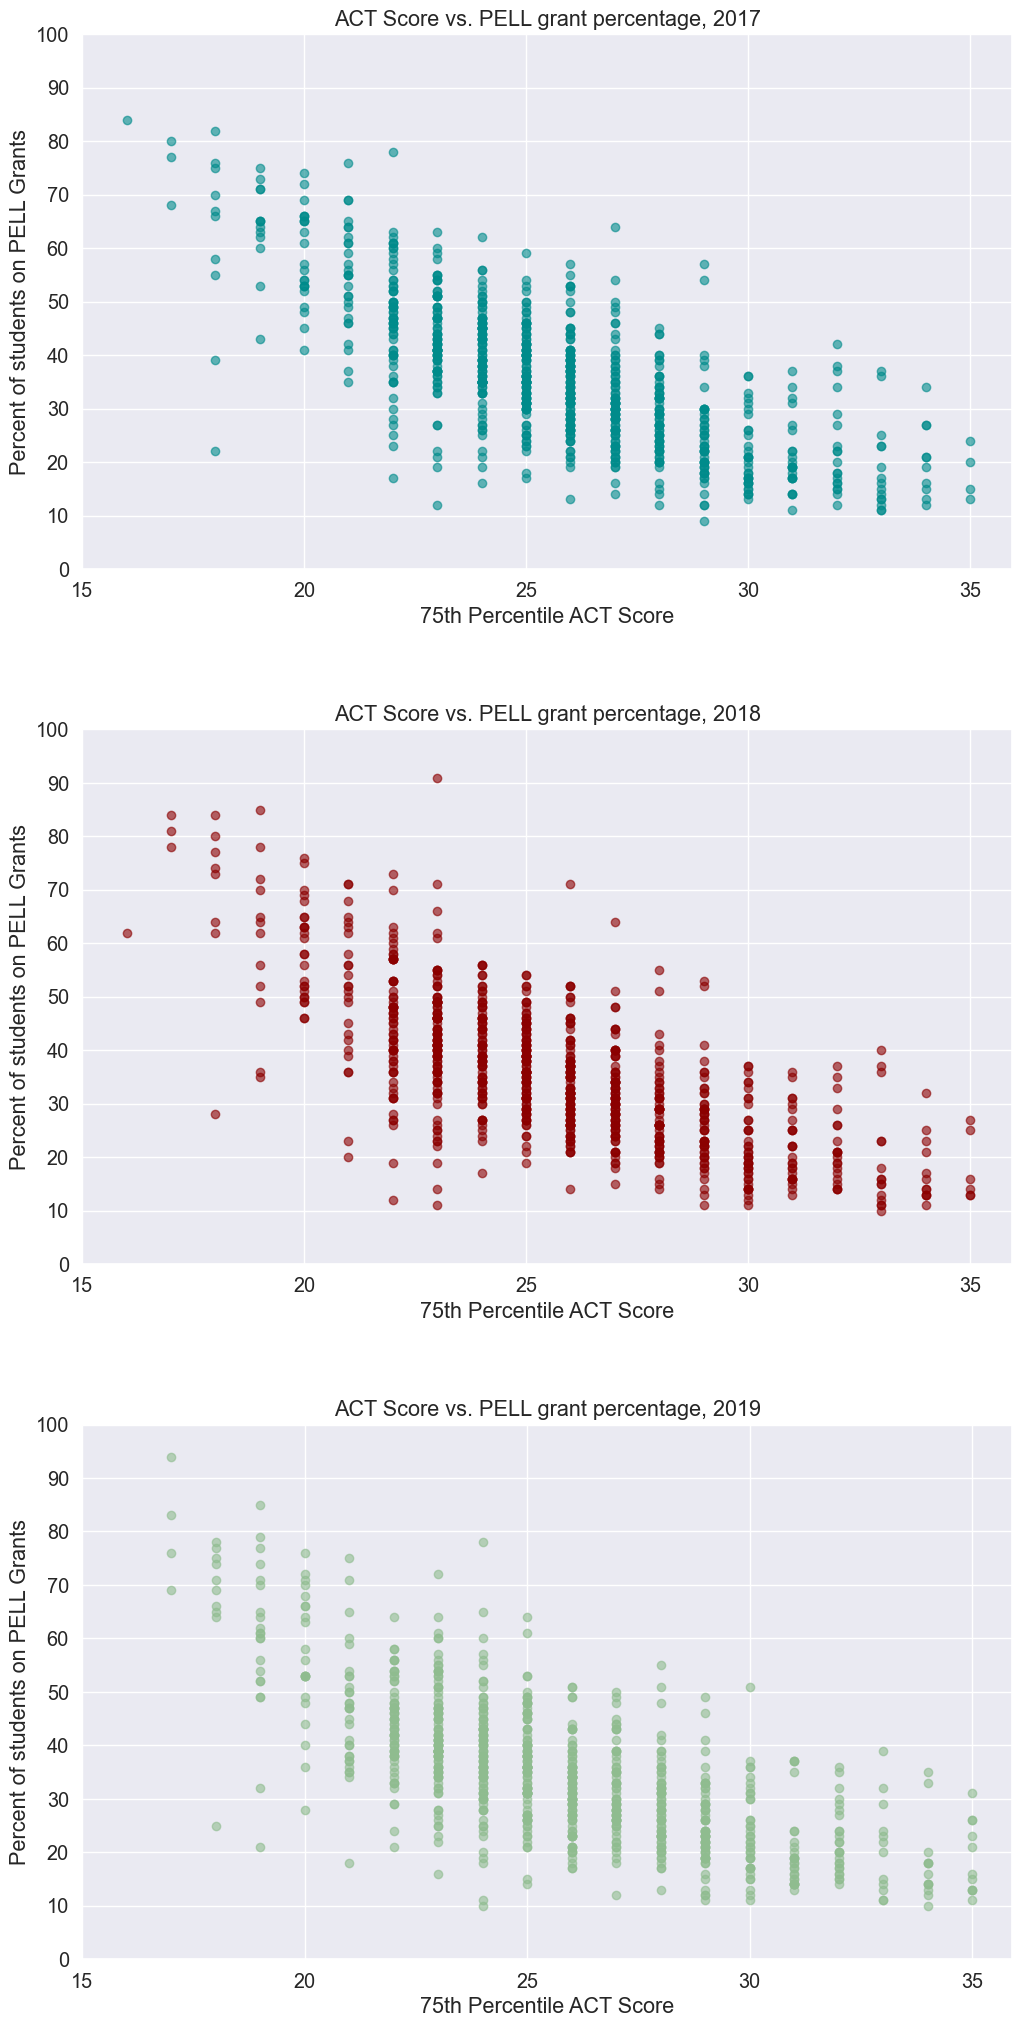

In [13]:
# For first visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)

# percentage of students on PELL grants
pell_percent = dict()

# list of years, colors, and constant alpha
dfs = [df_2017,df_2018,df_2019]
years=['2017', '2018', '2019']
colors = ['darkcyan', 'darkred', 'darkseagreen']
alpha = .6

# create a subplot of each year, showing scatterplot of SAT Scores VS. Pell grant percentage
for i in range(0, 3):
    act_scores = dfs[i].loc[:, 'ACT Composite 75th percentile'].values
    pell_percent = dfs[i].loc[:, 'Percent of students awarded Pell grants'].values
    plt.subplot(3, 1, i+1)
    plt.scatter(act_scores, pell_percent, c=colors[i], alpha=alpha)

    # label and format
    plt.title(f'ACT Score vs. PELL grant percentage, {years[i]}')
    plt.xlabel('75th Percentile ACT Score')
    plt.ylabel('Percent of students on PELL Grants')
    plt.xticks(np.linspace(15, 35, 5))
    plt.yticks(np.linspace(0, 100, 11))
  
    
# size and spacing
plt.gcf().set_size_inches(12, 25)
plt.subplots_adjust(hspace=.3)

In [14]:
# For second visualization

# extract columns for dataframes
df_new = df_ipeds[['State abbreviation (HD2019)', \
                  'Percent of undergraduate students awarded Pell grants (SFA1920_RV)', \
                 'Percent of undergraduate enrollment that are Black or African American (DRVEF2019_RV)']]

# drop rows with null data
df_new = df_new.dropna()

# change column names
df_new['State'] = df_new['State abbreviation (HD2019)'] 
df_new['Pell Grant Percentage'] = df_new['Percent of undergraduate students awarded Pell grants (SFA1920_RV)']
df_new['African-American Student Percentage'] = \
    df_new['Percent of undergraduate enrollment that are Black or African American (DRVEF2019_RV)']

# extract into new data frame
df_state = df_new[['State', 'Pell Grant Percentage', 'African-American Student Percentage']]

# group by the average of 'Pell Grant Percentage' & 'African-American Student Percentage' for each state
df_states = df_state.groupby('State').mean()

# drop territories
for terr in ['AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI']:
    df_states = df_states.drop(terr)

In [15]:
import plotly.graph_objs as go

# get state abbreviations
states = df_states.index.tolist()

# plot figure
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'USA-states',        
        'locations': states,
        'colorscale':'Portland',            
        'text':[f'{state} Pell Grant Percentage' for state in states],
        'z': df_states['Pell Grant Percentage']
    },     
    layout = {
      'geo':{
          'scope':'usa'
      }  
    })

choropleth_map.update_layout(
    title_text = 'Average Percent of Students Receiving Pell Grants by Institution in Each State'
)

choropleth_map

In [16]:
# plot figure
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locationmode':'USA-states',        
        'locations': states,
        'colorscale':'Portland',            
        'text':[f'{state} African-American Student Percentage' for state in states],
        'z': df_states['African-American Student Percentage']
    },     
    layout = {
      'geo':{
          'scope':'usa'
      }  
    })

choropleth_map.update_layout(
    title_text = 'Average Percent of African-American Students by Institution in Each State'
)

choropleth_map

#### Analysis
These visualizations show potential early trends from initial analysis and possible important features to focus on. Later machine learning insights led us away from geographical and racial analysis and we expanded upon the relationships between test scores and pell grant percentage

<a id='method'></a>
## Method

One of the assumptions required for this is that the college’s statistics accurately represent the population of that school. There is also a selection bias in the college admissions process since colleges have certain admissions policies, which may inhibit ideal analysis of the college’s demographics. Additionally, factors like a college’s implementation of affirmative action may skew the selection of ethnic, socioeconomic, and standardized testing data. For the sake of this investigation, we are treating the data as if it is representative of institutions’ values and admissions practices. PELL Grants are a federal grant provided to students of low income by their institution, so we used the percentage of an institution’s students on PELL Grants as a proximity estimation for the percentage of students in poor economic standing.
<br>
<br>
For our models, we chose to focus on each institution’s 75th percentile score on the ACT as it reflects a relevant academic admissions standard. Additionally, common industry practices suggests institutions accept and treat the ACT and SAT equally, meaning our decision of which test to use is not necessarily significant.
<br>
<br>
As we are interested in the factors that affect college admissions, we chose a random forest regressor as one of our methods to see how important each feature is in predicting test scores. We chose to use a regressor as the target variables we predicted were continuous values. You can read more about how a random forest model works [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2?gi=b522b39bebc8).
<br> 
<br>
Once we had solved for the feature importances, we found that one feature was far more significant in the random forest regressor than others, so we chose to further investigate that individual feature using a classic regression model between ACT 75th percentile score and the feature. This would allow us to directly observe any relationship between the two and whether the correlation was positive or negative.
<br>
<br>
To supplement the quantitative analysis provided by the feature importance analysis, we wanted to explore any qualitative similarities that exist between institutions in terms of the socioeconomic and demographic characteristics of their students. To do this, we conducted a principal component analysis on the data to reduce the number of features analyzed from over 30 to 2 in order to prepare the data for K-Means clustering. The K-Means clustering model was chosen, as it seemed to be the most direct method of categorizing the schools based upon their similarities, but k-nearest neighbors could have sufficed as well. As shown in the figure, there is a positive relationship between each component of PCA and the ACT composite 75th percentile score, because as pca0 and pca1 increase, so too do ACT scores. We furthered this investigation by clustering the PCA data on 4 clusters, as suggested by yearly elbow plots. 

<a id='results'></a>
## Results
<br>

<a id='rf'></a>
### Random Forest

We first tried predicting the acceptance rate of a school (excluding all variables that were related such as total admitted) using the random forest regressor, but the accuracy scores were all lower than .4. 
<br>
<br>
### Regressing on Acceptance Rate

In [17]:
import pandas as pd

# read the dataframes
# df_2017 = pd.read_csv('data/IPEDS_2017.csv')
# df_2018 = pd.read_csv('data/IPEDS_2018.csv')
# df_2019 = pd.read_csv('data/IPEDS_2019.csv')

In [18]:
# encode the state column for each dataframe
df_2017 = pd.get_dummies(df_2017, columns = ['State'])
df_2018 = pd.get_dummies(df_2018, columns = ['State'])
df_2019 = pd.get_dummies(df_2019, columns = ['State'])

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

sns.set()

def df_rfreg(df, target_col, col_start, col_end = None, max_depth = 5, n_splits = 10):
    """ performs random forest regerssion on a dataframe
    
    Args:
        df (DataFrame): dataframe to do randomforest regression on
        target_col (str): column name of the target variable
        col_start (str): column to start at for initializing x variable
        col_end (str): column to end at for initializing x variable
        max_depth (int): max depth of random forest regressor
        n_splits (int): n_splits for cross validation on KFold
    
    Returns:
        y_pred (array): array of predictions calculated from random forest regressor
    """
    # get a dataframe without the target column
    df_x = df.drop(target_col, axis = 1)
    
    # initalize the x and y variables
    x = df_x.loc[:, col_start : col_end].values
    y = df.loc[:, target_col].values
    
    #initialize Random Forest Regressor and cross validation
    rf_reg = RandomForestRegressor(max_depth = max_depth)
    kfold = KFold(n_splits = n_splits)

    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(x, y):
        # get training data
        x_train = x[train_idx, :]
        y_train = y[train_idx]

        # get test data
        x_test = x[test_idx, :]

        # fit data
        rf_reg = rf_reg.fit(x_train, y_train)

        # estimate on test data
        y_pred[test_idx] = rf_reg.predict(x_test)
        
    return y, y_pred, rf_reg

In [20]:
import matplotlib.pyplot as plt

def plot_feat_import(feat_list, feat_import, title, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]
    
    
    # get the color map
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.title(title)
    plt.xlabel('Mean decrease in Mean-Squared Error across all Decision Trees')
    plt.show()

The r^2 of the 2017 model is: 0.3212540806116252


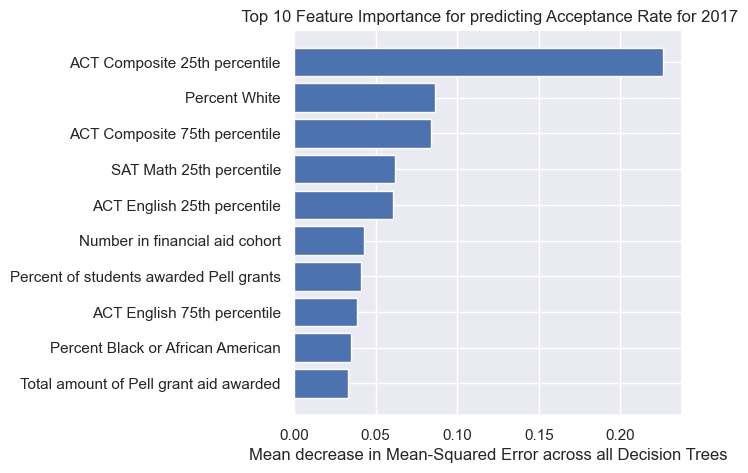

The r^2 of the 2018 model is: 0.3284512267894567


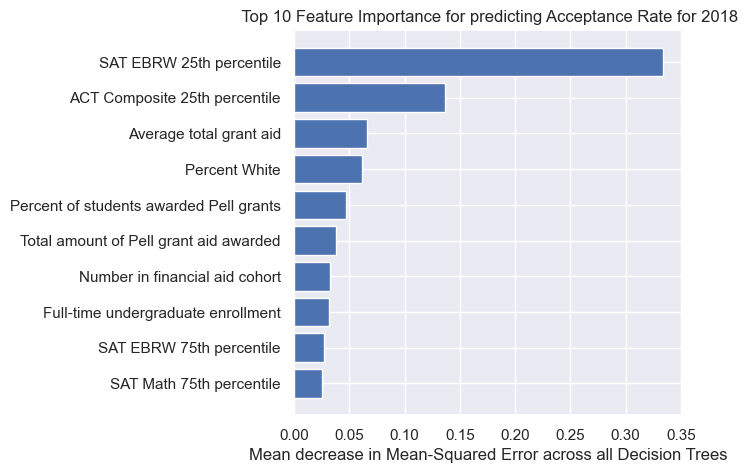

The r^2 of the 2019 model is: 0.3509462744663747


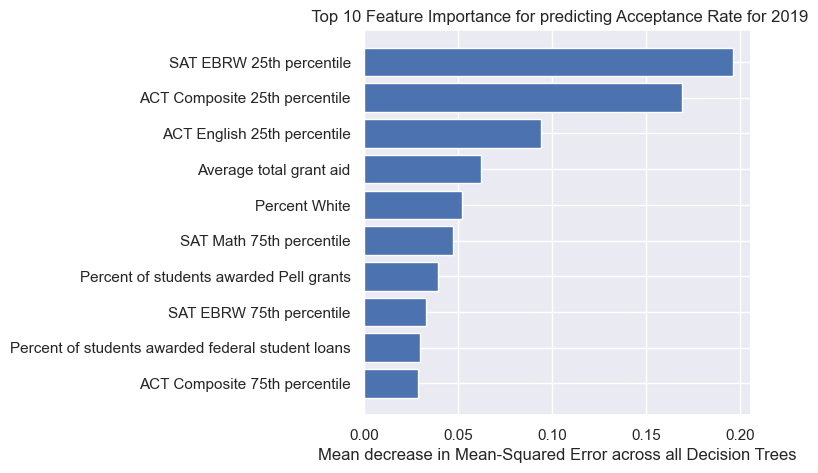

In [21]:
from sklearn.metrics import r2_score

years = ['2017', '2018', '2019']

# create a list of all the dataframes
dfs = [df_2017, df_2018, df_2019]

# for each year and dataframe perform a random forest regression and the r2 value
for year, df in zip(years, dfs):
    
    # drop all the columns that are related to the target variable
    df = df.drop(['Applicants total', 'Admissions total', 'Enrolled total', 'Enrolled full time total', 
                  'Enrolled part time total'], axis = 1)
    
    y, y_pred, rf_reg = df_rfreg(df, target_col = 'Acceptance Rate', col_start = 'Percent on any financial aid', 
                      col_end = 'ACT Math 75th percentile')
    
    # get r^2 of model
    print(f'The r^2 of the {year} model is:', r2_score(y_true = y, y_pred = y_pred))
    
    # drop the target variable
    df = df.drop(['Acceptance Rate'], axis = 1)
    
    # get the column names of the features
    x_feat_list = df.loc[:, 'Percent on any financial aid':'ACT Math 75th percentile'].columns
    
    # plot the feature importances
    plot_feat_import(x_feat_list, rf_reg.feature_importances_, title = f' Top 10 Feature Importance for predicting Acceptance Rate for {year}', 
                     limit = 10)

### Pivoting
As we wanted to observe feature importance, the results are not relevant because they do not have a high enough $r^2$. As a result, we decided to look into another variable. Since standardized testing scores are generally highly weighted in institutions' admissions processes, we decided to focus on each institution’s 75th percentile score on the ACT. As we did with the prior model, all other features in the dataset except those related to testing such as the SAT scores and other various ACT score-related features were used. 
<br>
### Regressing on ACT Score

The r^2 of the 2017 model is: 0.7147012021621187


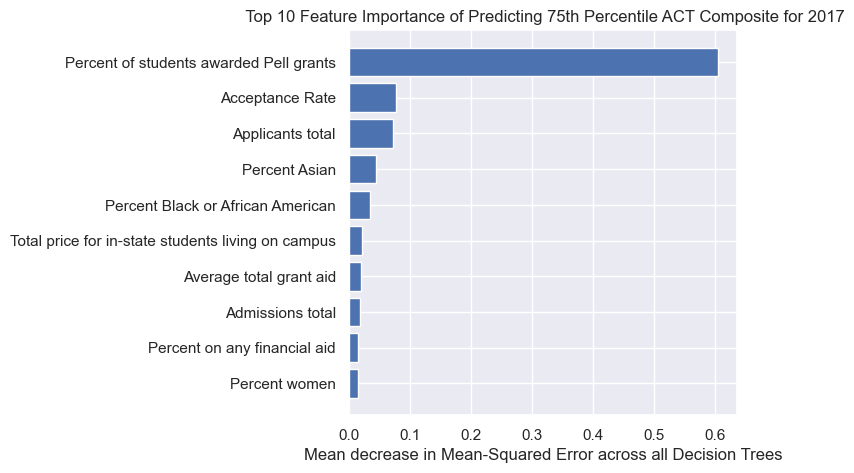

The r^2 of the 2018 model is: 0.7045124534198799


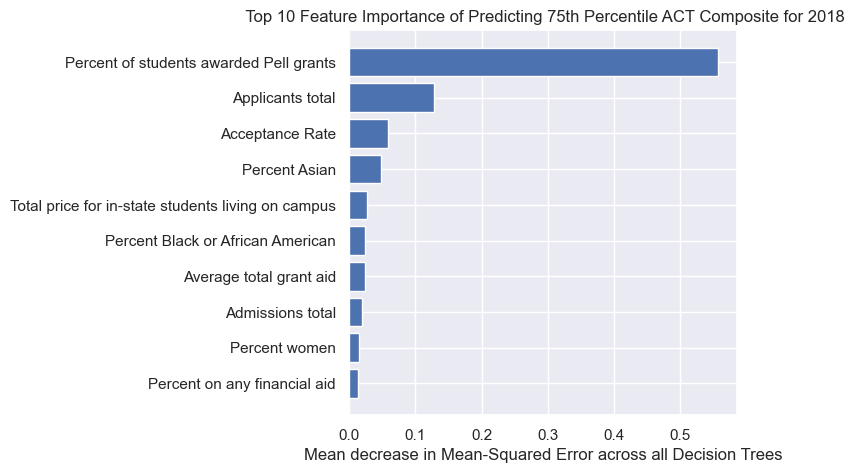

The r^2 of the 2019 model is: 0.705477685255369


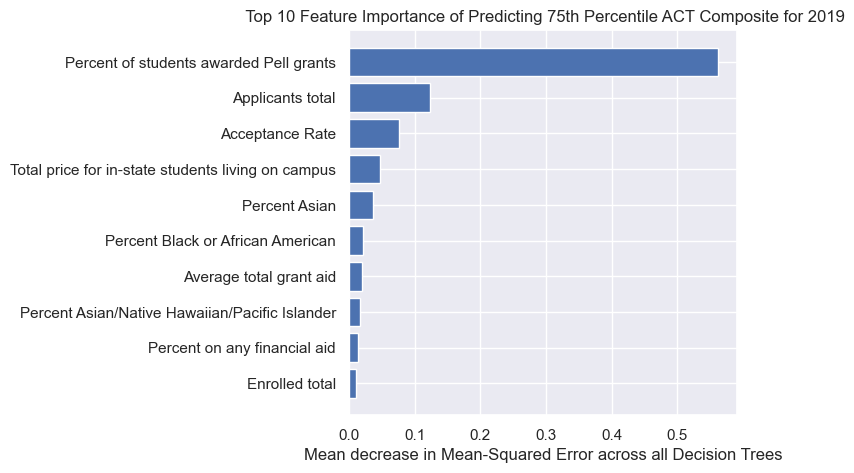

In [28]:
# for each year and dataframe perform a random forest regression and the r2 value
for year, df in zip(years, dfs):
    y, y_pred, rf_reg = df_rfreg(df, target_col = 'ACT Composite 75th percentile', col_start = 'Percent on any financial aid', 
                      col_end = 'Enrolled part time total')
    
    # get r^2 of model
    print(f'The r^2 of the {year} model is:', r2_score(y_true = y, y_pred = y_pred))
    
    
    # get the column names of the features
    x_feat_list = df.loc[:, 'Percent on any financial aid':'Enrolled part time total'].columns

    # plot the feature importances
    plot_feat_import(x_feat_list, rf_reg.feature_importances_, title = f' Top 10 Feature Importance of Predicting 75th Percentile ACT Composite for {year}', 
                     limit = 10)

#### Interpretation
Based on this model, we got an $r^2$ value of roughly .7 each year. This means that the features in the dataset describe ~70% of the variance of the 75th percentile ACT composite scores. As shown by the feature importance plots, PELL grant percentage far outweighs the other features as, on average, it decreases the mean-squared error by aorund .5 for each year.

<a id='svr'></a>
### Single Variable Regression

Because of the outsized influence in feature importance for PELL Grant Percentage in predicting ACT 75th percentile score, we decided to further investigate its unique impact on ACT Scores. Finding the directionality of the correlation could be useful in finding its importance.

In [23]:
# importing libraries
import numpy as np
from sklearn.metrics import r2_score

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept, year):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='y_true')
    
    # compute linear predictions 
    # x is a numpy array so each element gets mulitplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='y_pred (regression)')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        # compute predicted position
        y_pred_i = slope * x_i + intercept
    
    
    # plt.legend()
    plt.xlabel('Institutional Percentage of Students Receiving Pell Grants')
    plt.ylabel(y_feat)
    
    # compute mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    
    R2 = r2_score(y_true=y, y_pred=y_pred)
    
    # round slope and intercept for display
    d_slope = round(slope, 4)
    d_int = round(intercept, 4)
    
    # add title which shows model and MSE
    plt.title(f'ACT Score vs. Pell Grant Reception For {year} School Year ($R^2$ = {R2:.3f})\n \
    Prediction line slope: {d_slope}, intercept: {d_int}', fontsize = 20)
    plt.gcf().set_size_inches(10, 7)
    plt.xlim(0, 100)
    plt.xticks(np.linspace(0, 100, 11))
    plt.yticks(np.linspace(15, 35, 5))

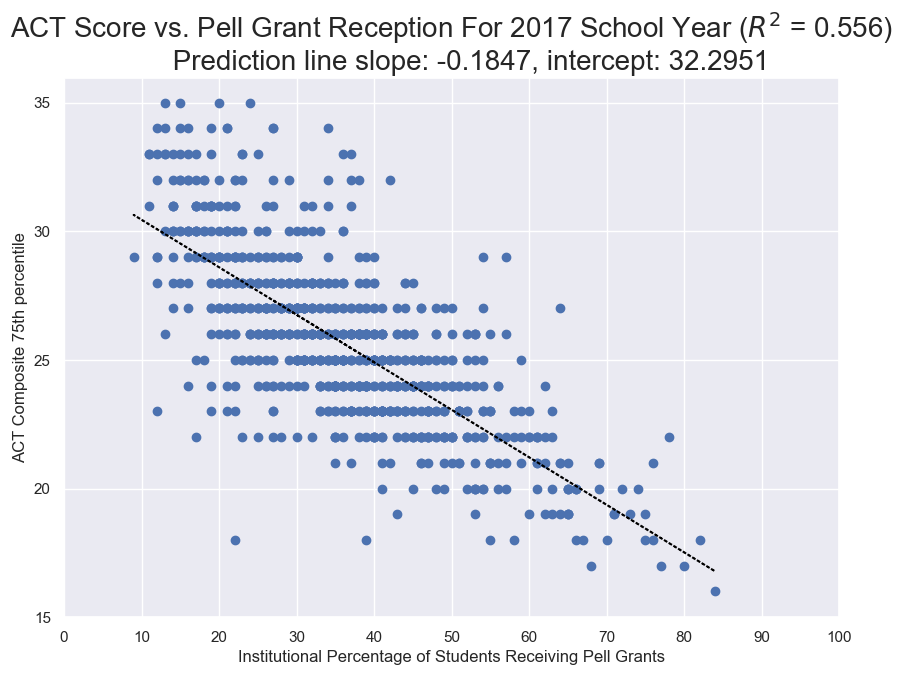

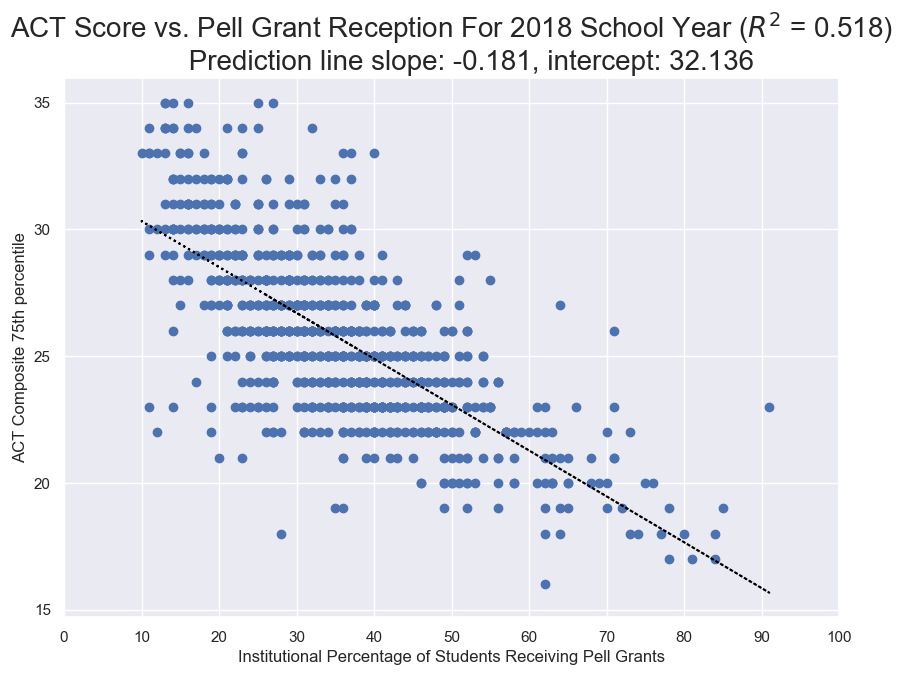

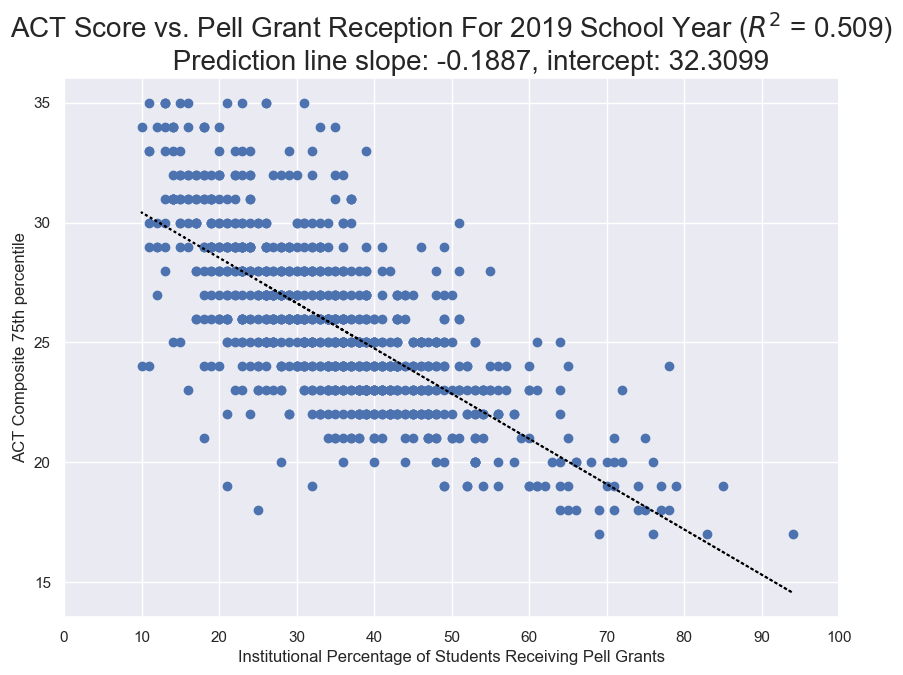

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model as lm

# define iterable dataframes
dfs = [pd.read_csv(f'data\IPEDS_201{yr}.csv') for yr in range(7, 10)]
year = 17

df_coeff = pd.DataFrame()

# for each dataframe
for df in dfs:
    # setting index
    df = df.set_index('UnitID')

    # isolating x features and x data
    x_feat_list = df.loc[:, 'Percent of students awarded Pell grants']
    x = np.array(df.loc[:, 'Percent of students awarded Pell grants'])
    
    # isolating y feature and y data
    y_feat = 'ACT Composite 75th percentile'
    y = df.loc[:, y_feat]

    # reshape x to specify it is 1 feature and many samples
    x = x.reshape((-1, 1))

    # initialize sklearn model
    reg = LinearRegression()

    # fit the model
    reg.fit(x, y)

    # same as a_1
    slope = reg.coef_[0]

    # same as a_0
    intercept = reg.intercept_
    
    # defining labels for graph
    pred_label = f'Predicted {y_feat}'
    act_label = f'Actual {y_feat}'

    # creating new dataframe with predicted and true data
    y_pred = pd.DataFrame(reg.predict(x), columns = [pred_label])
    df_true_pred = pd.concat([y, y_pred], axis = 1)
    df_true_pred.T

    # calculating r2
    r2 = r2_score(y_pred = y_pred, y_true = y)

    # show fit
    show_fit(x, y, slope, intercept, f'20{year}')
    
    year += 1

#### Interpretation
Seeing that the results over all three years show a consistently negative correlation between PELL Grant percentage and ACT score, it can be concluded that institutions with a high percentage of low-income students have generally lower institutional ACT scores. With an $r^2$ of about .5 for each year, it is confirmed that PELL Grant percentage has a high individual imapact on ACT score.

<a id='pca'></a>
### Principal Component Analysis
The following code was used to produce three different visualizations of the principal component analysis on the 2017-18, 2018-19, and 2019-20 datasets:

In [25]:
# importing necessary libraries
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA

# define iterable dataframes
dfs =  [df_2017, df_2018, df_2019]
year = 17

# for each dataframe
for df in dfs:
    # isolating quantitative x features
    x_feat_list = df.columns[2:9]
    x_feat_list = x_feat_list.append(df.columns[11:33])
    
    # isolating x data
    x = df.loc[:, 'Percent on any financial aid' : 'Enrolled part time total']
    
    # normalizing x data
    x /= x.std()
    
    # isolating y data
    y_feat = 'ACT Composite 75th percentile'
    y = df.loc[:, y_feat]
    
    # fitting PCA model and adding PCA variables to dataframe
    pca = PCA(n_components = 2, whiten = True)
    df['pca0'], df['pca1'] = pca.fit_transform(x).T

    # plotting PCA analysis
    fig = px.scatter(df, x = 'pca0', y = 'pca1', hover_data = ['Name', 'Full-time undergraduate enrollment'], \
                     color = y_feat, title = f'PCA of {y_feat} on 20{year}-20{year + 1} IPEDS Data')
    
    # adjusting font sizes
    fig.update_layout(
        title_font_size=25,
        xaxis = dict(titlefont = dict(size=20), tickfont = dict(size=20)),
        yaxis = dict(titlefont = dict(size=20), tickfont = dict(size=20)),
    )
    
    # showing figure
    fig.show()
    
    # move onto next dataframe
    year += 1

#### Observation
Based on the PCA for all three years, we observed that institutions in the upper-right part of the graphs tended to have higher ACT scores, and the lower-left institutions had lower ACT scores. This is not sufficient for further conclusions.

<a id='kmeans'></a>
### K-Means Clustering


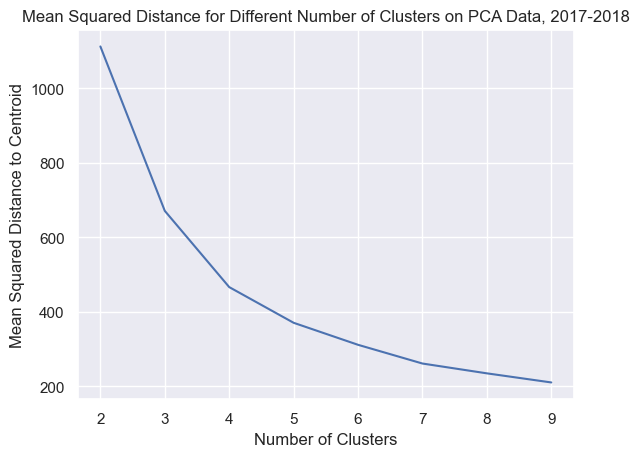

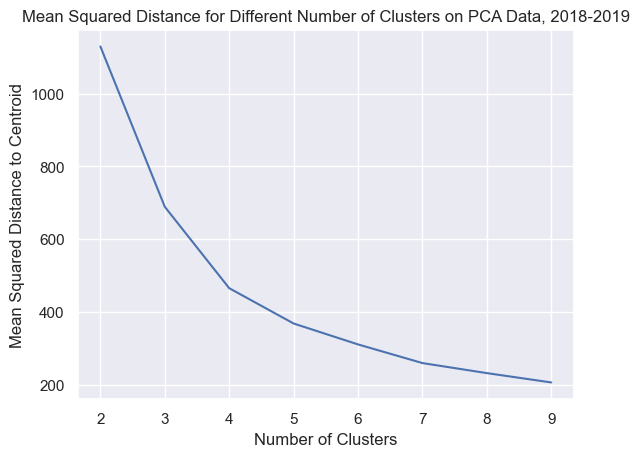

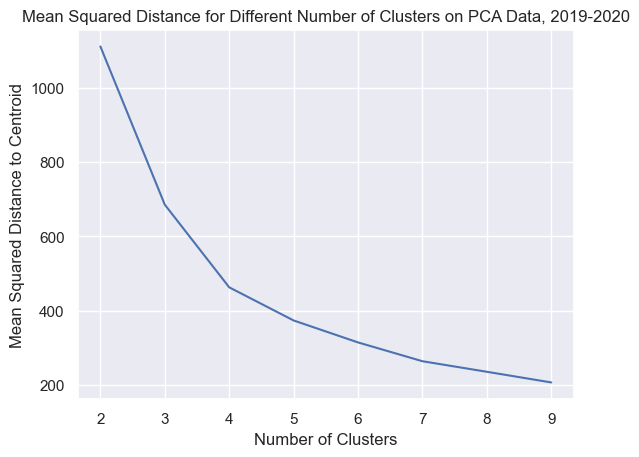

In [26]:
# import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

sns.set()

year = 2017

for df in dfs:
    # keys are k (number of clusters), values are mean_d (mean distance
    # from each sample to its cluster centroid)
    mean_d_dict = dict()

    # defining pca variable
    pca = df.loc[:, 'pca0' : 'pca1']

    # iterating k means for several numbers of clusters
    for n_clusters in range(2, 10):
        # fit kmeans
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(pca)
        pca_y = kmeans.predict(pca)    

        # compute & store mean distance
        mean_d = -kmeans.score(pca)
        mean_d_dict[n_clusters] = mean_d

    # plotting elbow function
    plt.plot(mean_d_dict.keys(), mean_d_dict.values())
    plt.xlabel('Number of Clusters')
    plt.ylabel('Mean Squared Distance to Centroid')
    plt.title(f'Mean Squared Distance for Different Number of Clusters on PCA Data, {year}-{year+1}')
    plt.show()
    
    year+=1

#### Interpretation
Based on the elbow graphs, 4 clusters would be ideal for K-Means clustering because it is a combination of the least mean squared distance to centroid combined with the lowest cluster number (for simplicity).

In [27]:
# plotting k-Means for 4 clusters
clusters = 4

year = 2017

for df in dfs:
    pca = df.loc[:, 'pca0' : 'pca1']

    # evaluating k-Means at clusters
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(pca)
    pca_y = kmeans.predict(pca) 

    # plotting PCA analysis
    fig = px.scatter(df, x = 'pca0', y = 'pca1', hover_data = ['Name', 'Full-time undergraduate enrollment', \
                                                                   'Percent of students awarded Pell grants'],
                         color = pca_y, title = f'PCA Analysis on {year}-{year + 1} IPEDS Data')
    fig.update_coloraxes(showscale=False)
    fig.show()
    
    year+=1

#### Observations
After clustering, we were unable to find any obvious association between any of the institutions in the same clusters. While this doesn't necessarily mean there aren't any unifying features in the clusters, but there were no observable surface-level connections.

<a id='discussion'></a>
## Discussion 
While our investigation showed intriguing trends in admissions practices, its conclusions aren’t necessarily significant in a vacuum. It is an intuitive conclusion that institutions with more low-income students may have lower average test scores. This is consistent with the systemic biases that appear in the testing industry. However, our analysis did show the interesting observation that Pell Grant Percentage was the most important factor in predicting an institution’s average test score. This conclusion may shed light on a previously unconsidered relationship when schools are admitting students. Are schools with more financial resources choosing to admit higher income students and this is lowering their test scores? Are schools only considering the test scores and the Pell Grant result is indicative of other systemic factors? It is hard to answer these questions without further analysis and information.
<br>
<br>
As for our PCA, while we can not utilize our categories to make any significant conclusions, it is interesting to note that surface level observations could not necessarily show similar types of institutions grouped together in how they consider ACT scores and other factors. The intuitive assumption would be that similar institutions share admissions practices. Larger public institutions would likely consider things differently than small, prestigious, private institutions. This makes sense, but nothing was explicitly confirmed by the principal component analysis.
<br>
<br>
While we don’t think our analysis should be used by itself to make recommendations, it can help guide future research. In the future, it would be useful to collect sentiments and discrete practices from institutions themselves to gauge what factors they value in student evaluation as well as how universities view diversity in their admissions goals. From an ethical perspective, it is important to remember most of these statistics are influenced directly by humans making decisions. Admissions officers are inherently biased so hearing their perspectives would be useful in interpreting results. Additionally, utilizing individual data to investigate the direct impacts of socioeconomic factors on testing or admissions for specific students would be useful. Our models can not accomplish such analysis at the institutional level. Unfortunately, the likelihood of this type of dataset to be made public and accessible is low. 